In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\DELL\Downloads\ML Project - Random Forest Hotel Cancellation Prediction Analysis 16955485770.csv')

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03/07/2015


In [4]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [5]:
df.shape

(119390, 32)

In [6]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [7]:
df['agent'].mean()

86.69338185346919

In [8]:
df.fillna(df['agent'].mean())

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,86.693382,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,86.693382,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,86.693382,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,86.693382,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,86.693382,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,86.693382,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,86.693382,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,86.693382,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,86.693382,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [9]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [10]:
df['agent']=df['agent'].replace(np.nan,df['agent'].mean())

In [11]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                                  0
company         

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
df['company']=df['company'].replace(np.nan,df['company'].mean())

In [14]:
df.dropna()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,01/07/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,86.693382,189.266735,0,Transient,0.00,0,0,Check-Out,01/07/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,86.693382,189.266735,0,Transient,75.00,0,0,Check-Out,02/07/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.000000,189.266735,0,Transient,75.00,0,0,Check-Out,02/07/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.000000,189.266735,0,Transient,98.00,0,1,Check-Out,03/07/2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.000000,189.266735,0,Transient,96.14,0,0,Check-Out,06/09/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.000000,189.266735,0,Transient,225.43,0,2,Check-Out,07/09/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.000000,189.266735,0,Transient,157.71,0,4,Check-Out,07/09/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.000000,189.266735,0,Transient,104.40,0,0,Check-Out,07/09/2017


In [15]:
df.dropna(inplace=True)

In [16]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

<Axes: xlabel='adults'>

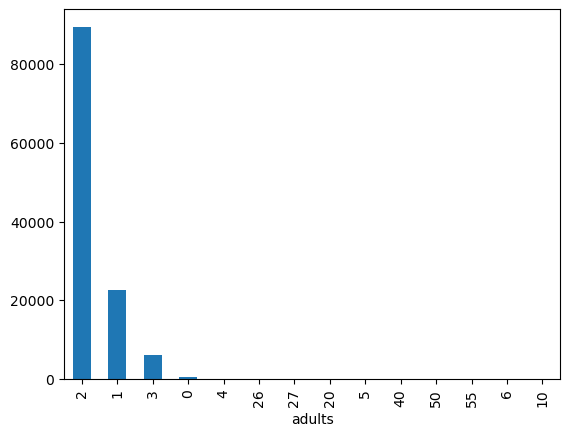

In [17]:
df['adults'].value_counts().plot(kind='bar')

<Axes: xlabel='children'>

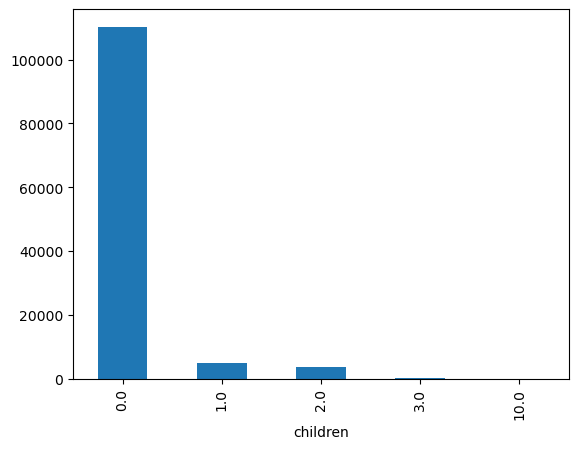

In [18]:
df['children'].value_counts().plot(kind='bar')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  object 
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  object 
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

In [20]:
df.drop('reservation_status_date',axis=1,inplace=True)

In [21]:
#Label Encoding

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
enc=LabelEncoder()

In [24]:
df['hotel']=enc.fit_transform(df['hotel'])
df['arrival_date_month']=enc.fit_transform(df['arrival_date_month'])
df['meal']=enc.fit_transform(df['meal'])
df['country']=enc.fit_transform(df['country'])
df['market_segment']=enc.fit_transform(df['market_segment'])
df['distribution_channel']=enc.fit_transform(df['distribution_channel'])
df['reserved_room_type']=enc.fit_transform(df['reserved_room_type'])
df['assigned_room_type']=enc.fit_transform(df['assigned_room_type'])
df['deposit_type']=enc.fit_transform(df['deposit_type'])
df['customer_type']=enc.fit_transform(df['customer_type'])
df['reservation_status']=enc.fit_transform(df['reservation_status'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 118898 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           118898 non-null  int32  
 1   is_canceled                     118898 non-null  int64  
 2   lead_time                       118898 non-null  int64  
 3   arrival_date_year               118898 non-null  int64  
 4   arrival_date_month              118898 non-null  int32  
 5   arrival_date_week_number        118898 non-null  int64  
 6   arrival_date_day_of_month       118898 non-null  int64  
 7   stays_in_weekend_nights         118898 non-null  int64  
 8   stays_in_week_nights            118898 non-null  int64  
 9   adults                          118898 non-null  int64  
 10  children                        118898 non-null  float64
 11  babies                          118898 non-null  int64  
 12  meal                 

In [26]:
df['is_canceled'].unique()

array([0, 1], dtype=int64)

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
x=df.drop('is_canceled',axis=1)
y=df['is_canceled']

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [30]:
x_train.shape

(83228, 30)

In [31]:
x_test.shape

(35670, 30)

In [32]:
from sklearn.ensemble import RandomForestClassifier

params_rf={'max_depth':16,
          'min_samples_leaf':1,
          'min_samples_split':2,
          'n_estimators':100,
          'random_state':12345}

model_rf=RandomForestClassifier(**params_rf)

In [33]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,classification_report,confusion_matrix

In [34]:
def rf_model(model,x_train,y_train,x_test,y_test):
    model.fit(x_train,y_train.ravel())
    y_pred=model.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print('precision_score:',precision_score(y_test,y_pred))
    print('recall_score:',recall_score(y_test,y_pred))
    print('accuracy={}'.format(accuracy))
    print(classification_report(y_test,y_pred,digits=5))
    print(confusion_matrix(y_test,y_pred))
    
    

In [35]:
rf_model(model_rf,x_train,y_train,x_test,y_test)

precision_score: 1.0
recall_score: 0.9998492386552088
accuracy=0.9999439304737875
              precision    recall  f1-score   support

           0    0.99991   1.00000   0.99996     22404
           1    1.00000   0.99985   0.99992     13266

    accuracy                        0.99994     35670
   macro avg    0.99996   0.99992   0.99994     35670
weighted avg    0.99994   0.99994   0.99994     35670

[[22404     0]
 [    2 13264]]
